## Install Dependencies:

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.2/800.2 kB 15.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 30.2/201.2 GB disk)


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 111.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 9.

## YOLO Inference:

In [3]:
# get pretrained model
from ultralytics import YOLO
model = YOLO("yolov8m.pt")
# if we want to use our finetuned model, upload first then provide the relative path as the arg.
# uploaded YOLOv8m_person_epoch50 by Calvin from CV D Batch 5
# model = YOLO("/content/yolov8m_person_epoch50.pt")

## Static Image Inference:

In [67]:
# Implement Inference:
import gradio as gr

def predict_image(text, img, conf_threshold, iou_threshold):
    src = img if img else text
    results = model.predict(
        source = src,
        conf = conf_threshold,
        iou = iou_threshold,
        show_labels = True,
        show_conf = True,
        classes = [0],
    )

    # For Returning Image:
    return results[0].plot(labels=False) if results else None


iface = gr.Interface(
    fn = predict_image,
    inputs = [
        # Upload Image:
        gr.Text(label = "Image URL"),
        gr.Image(sources = ['upload', 'webcam', 'clipboard'], type="pil", label="Image Input"),
        gr.Slider(minimum = 0, maximum = 1, value = 0.5, label = "Confidence threshold"),
        gr.Slider(minimum = 0, maximum = 1, value = 0.45, label = "IoU threshold"),
    ],
    outputs = gr.Image(type = "pil", label = "Result"),
    title = "Ultralytics Gradio YOLOv8",
    description = "Input URL / Upload images for YOLOv8 Object Detection.",
)
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://08e12e7050ab3c0c44.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Demo Image URL : https://i.redd.it/y52gcy5lmg271.jpg

## Static Video Inference

In [65]:
#implement inference
import gradio as gr
import cv2
import time

def predict(vid, conf_threshold, iou_threshold, out):
    # print(vid)
    time_start= time.time()
    # Inference
    results = model.predict(
        source=vid,
        conf=conf_threshold,
        iou=iou_threshold,
        show_labels=False,
        show_conf=True,
        classes=[0],
    )
    time_end = time.time()
    inference_time = time_end - time_start
    # Visualize the results on the frame
    print(results)
    annotated_frame = results[0].plot(labels=False)
    print(annotated_frame)
    # for returning video
    out.write(annotated_frame)
    return

def video_stream(vid, conf_threshold, iou_threshold):
  cap = cv2.VideoCapture(vid)
  width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  # print(width, height)
  cap.release()
  temp_video_path = "temp_prediction.mp4"
  out = cv2.VideoWriter(temp_video_path, cv2.VideoWriter_fourcc(*'mp4v'), 30, (width, height))
  cap = cv2.VideoCapture(vid)
  while True:
      ret, frame = cap.read()
      if not ret:
          break
      predict(frame, conf_threshold, iou_threshold, out)

  # Release the VideoCapture object
  cap.release()
  out.release()
  return temp_video_path


iface = gr.Interface(
    fn=video_stream,
    inputs=[
        gr.Video(),
        gr.Slider(minimum=0, maximum=1, value=0.3, label="Confidence threshold"),
        gr.Slider(minimum=0, maximum=1, value=0.3, label="IoU threshold"),
    ],
    outputs=gr.PlayableVideo(),
    title="Ultralytics Gradio YOLOv8",
    description="Upload video for YOLOv8 object detection.",
)
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://68003f19157647345f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Rata-rata Inference Time 9-10ms per frame

durasi video : 10s
fps: 30
jumlah frame: 300
total inference time: 13s

## Test local webcam as source in GCollab (without Gradio)




### Static Image

In [4]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


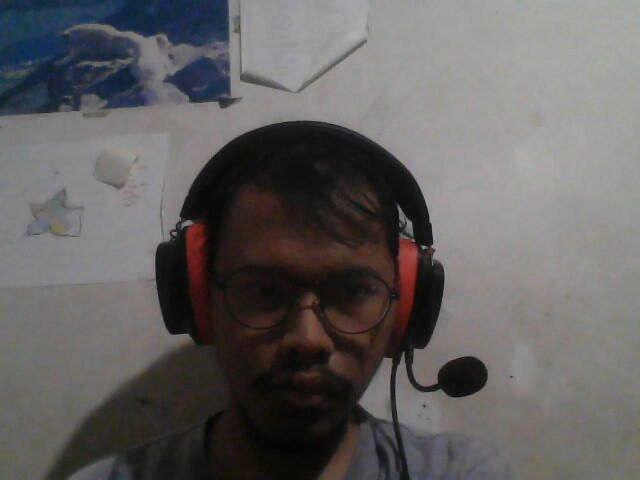

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/photo.jpg: 480x640 1 person, 164.7ms
Speed: 4.2ms preprocess, 164.7ms inference, 558.4ms postprocess per image at shape (1, 3, 480, 640)


array([[[ 72,  50,  38],
        [ 71,  49,  37],
        [ 67,  48,  35],
        ...,
        [164, 170, 165],
        [164, 170, 165],
        [163, 169, 164]],

       [[ 71,  49,  37],
        [ 70,  48,  36],
        [ 68,  46,  34],
        ...,
        [164, 170, 165],
        [163, 169, 164],
        [163, 169, 164]],

       [[ 71,  47,  35],
        [ 68,  46,  34],
        [ 67,  46,  31],
        ...,
        [164, 170, 165],
        [163, 169, 164],
        [163, 169, 164]],

       ...,

       [[ 79,  94,  86],
        [ 79,  94,  86],
        [ 80,  94,  88],
        ...,
        [100, 114, 112],
        [101, 115, 113],
        [101, 115, 113]],

       [[ 78,  93,  85],
        [ 79,  94,  86],
        [ 79,  94,  86],
        ...,
        [100, 114, 112],
        [101, 115, 113],
        [101, 115, 113]],

       [[ 78,  93,  85],
        [ 78,  93,  85],
        [ 79,  94,  86],
        ...,
        [100, 114, 112],
        [101, 115, 113],
        [101, 115, 113]]], dtype=uint8)
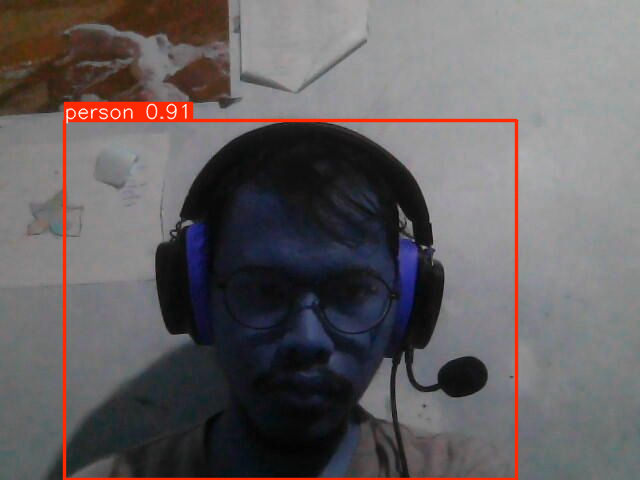

In [5]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
  # Inference
  results = model.predict(source=filename, show=True, classes=[0])
  display(results[0].plot())
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### Video Stream

Notes: WIP in bounding box display

In [68]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [69]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

In [70]:
# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [71]:
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [74]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    # gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    results = model(
        source=img,
        conf=0.3,
        iou=0.3,
        show_labels=False,
        show_conf=True,
        classes=[0],
        verbose=False
    )

    # get face bounding box for overlay
    for result in results:
      if result.boxes.shape[0] > 0:
        [x1,y1,x2,y2] = result.boxes.xyxy[0].tolist()

        bbox_array = cv2.rectangle(bbox_array,(int(x1),int(y1)),(int(x2),int(y2)),(255,0,0),2)
        bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
        # convert overlay of bbox into bytes
        bbox_bytes = bbox_to_bytes(bbox_array)
        # update bbox so next frame gets new overlay
        bbox = bbox_bytes
      else:
        bbox = ''
    # bbox = results.plot(labels=False)

<IPython.core.display.Javascript object>